rerun on 2021-12-07 after correcting for salinity of media samples

In [1]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
from pathlib import Path
import seaborn as sns
sns.set()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
from collections import defaultdict
import os.path as op
import glob

os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/gtdb')
matplotlib.__version__



'3.3.3'

In [2]:

images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/GTDB_classification'
if os.path.isdir(images):
    print(images, "already exists.")
else:
    os.mkdir(images)
    print(images, "is created.")
    

/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/GTDB_classification already exists.


In [3]:
bac=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/gtdb/gtdb_classify_wf_out/gtdbtk.bac120.summary.tsv', sep='\t')                
bac

arc=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/gtdb/gtdb_classify_wf_out/gtdbtk.ar122.summary.tsv', sep='\t')                
arc
results=pd.concat([bac, arc])

results.to_csv('gtdb_classify_wf_bac120_ar122.summary.tsv', sep='\t')
results

,user_genome,classification,fastani_reference,fastani_reference_radius,fastani_taxonomy,fastani_ani,fastani_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings
0,AH-135-A01,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,GCF_000012345.1,95.0,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,95.21,0.80,GCF_000012345.1,95.0,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,95.21,0.80,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCF_000472565.1, s__Pelagibacter ubique_C, 95....",12.62,11,NaN,NaN
1,AH-135-A02,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,NaN,NaN,NaN,NaN,NaN,GCF_001735745.1,95.0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,81.76,0.74,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,taxonomic classification defined by topology a...,NaN,NaN,83.99,11,0.977344,Genome not assigned to closest species as it f...
2,AH-135-A03,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,NaN,NaN,NaN,NaN,NaN,GCF_000195085.1,95.0,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,92.88,0.89,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,NaN,"GCA_000750175.1, s__IMCC9063 sp000750175, 95.0...",58.57,11,0.993352,Genome not assigned to closest species as it f...
3,AH-135-A04,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,ANI,NaN,"GCF_003326015.1, s__Thioglobus singularis_A, 9...",73.99,11,0.956463,NaN
4,AH-135-A05,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,NaN,NaN,NaN,NaN,NaN,GCA_000384935.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,79.21,0.38,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,"GCA_000385055.1, s__SCGC-AAA076-P13 sp00038505...",26.39,11,0.973004,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,AH-660-L10,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,NaN,NaN,NaN,NaN,NaN,GCA_001437625.1,95.0,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,92.18,0.75,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,taxonomic classification defined by topology a...,NaN,"GCA_002737455.1, s__Nitrosopumilus sp002737455...",46.02,11,0.995081,Genome not assigned to closest species as it f...
75,AH-700-A15,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,NaN,NaN,NaN,NaN,NaN,GCA_013329255.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,89.50,0.69,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,taxonomic classification defined by topology a...,NaN,"GCA_002496955.1, s__MGIIa-L1 sp002496955, 95.0...",11.18,11,0.995039,"Genome domain questionable ( 2.5% Bacterial, 1..."
76,AH-709-C03,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,NaN,NaN,NaN,NaN,NaN,GCA_013329255.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,90.22,0.76,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,taxonomic classification defined by topology a...,NaN,"GCA_002502605.1, s__MGIIa-L1 sp002502605, 95.0...",39.95,11,0.992293,Genome not assigned to closest species as it f...
77,AH-709-J22,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,GCA_002505405.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,98.82,0.71,GCA_002505405.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,98.82,0.71,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_002726495.1, s__Poseidonia sp002726495, 95...",37.55,11,NaN,NaN


In [4]:
classification=results[['user_genome', 'classification']].copy()
classification[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=classification.classification.str.split(';', expand=True)
classification=classification.rename(columns = {'classification':'GTDBtk_classification'})
classification['count']=1
classification.to_csv('gtdb_classify_wf_classifications_ar122_bac120.csv')
classification

,user_genome,GTDBtk_classification,domain,phyla,class,order,family,genus,species,count
0,AH-135-A01,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter,s__Pelagibacter ubique,1
1,AH-135-A02,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__Hel1-33-131,s__,1
2,AH-135-A03,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__IMCC9063,s__,1
3,AH-135-A04,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__PS1,f__Thioglobaceae,g__Thioglobus,s__,1
4,AH-135-A05,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86,f__D2472,g__SCGC-AAA076-P13,s__,1
...,...,...,...,...,...,...,...,...,...,...
74,AH-660-L10,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,d__Archaea,p__Thermoproteota,c__Nitrososphaeria,o__Nitrososphaerales,f__Nitrosopumilaceae,g__Nitrosopumilus,s__,1
75,AH-700-A15,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,d__Archaea,p__Thermoplasmatota,c__Poseidoniia,o__Poseidoniales,f__Poseidoniaceae,g__MGIIa-L1,s__,1
76,AH-709-C03,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,d__Archaea,p__Thermoplasmatota,c__Poseidoniia,o__Poseidoniales,f__Poseidoniaceae,g__MGIIa-L1,s__,1
77,AH-709-J22,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,d__Archaea,p__Thermoplasmatota,c__Poseidoniia,o__Poseidoniales,f__Poseidoniaceae,g__Poseidonia,s__Poseidonia alphae,1


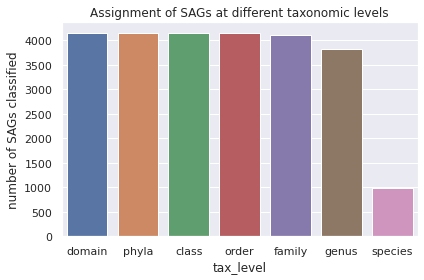

In [5]:
domain=classification[classification['domain']!='d__']
drows=len(domain)

phyla=classification[classification['phyla']!='p__']
prows=len(phyla)

cla=classification[classification['class']!='c__']
crows=len(cla)

order=classification[classification['order']!='o__']
orows=len(order)

family=classification[classification['family']!='f__']
frows=len(family)

genus=classification[classification['genus']!='g__']
grows=len(genus)

species=classification[classification['species']!='s__']
srows=len(species)

# create a plot showing how many cells are classified at each taxonomic level 
d={'tax_level': ['domain', 'phyla', 'class', 'order', 'family', 'genus','species'], 'number of SAGs classified': [drows, prows, crows, orows, frows, grows, srows]}
fig, ax = plt.subplots()
sns.set_style("white")
calssified=pd.DataFrame(data=d)
calssified
sns.set
sns.barplot(data=calssified, x='tax_level', y='number of SAGs classified')
ax.set_title('Assignment of SAGs at different taxonomic levels')

plt.tight_layout()
plt.savefig(images+"GTDB_taxonomic_levels.pdf")

In [6]:
! wc -l /mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate.csv



5851 /mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate.csv


### Big Question 
How many of the genera have more than 1 species present? I can not count the unassigned species but I can look at those with multiple assigned species.

In [7]:
# classify down to the Genus level and use this as my classification

classification=pd.read_csv('gtdb_classify_wf_classifications_ar122_bac120.csv')
classification['phyla']=classification['phyla'].str[3:]
classification['class']=classification['class'].str[3:]
classification['order']=classification['order'].str[3:]
classification['family']=classification['family'].str[3:]
classification['genus']=classification['genus'].str[3:]
classification['species']=classification['species'].str[3:]
classification


classification['GTDB_classification'] = classification['phyla']

classification.loc[classification['class'] != '', 'GTDB_classification'] = classification['class']
classification.loc[classification['order'] != '', 'GTDB_classification'] = classification['order']
classification.loc[classification['family'] != '', 'GTDB_classification'] = classification['family']
classification.loc[classification['genus'] != '', 'GTDB_classification'] = classification['genus']

classification=classification.rename(columns={'user_genome':'SAG'})
classification.to_csv('gtdb_classify_wf_classifications_ar122_bac120.csv')

classification

GTDB_class=classification[['SAG', 'GTDB_classification', 'GTDBtk_classification']]
GTDB_class


,SAG,GTDB_classification,GTDBtk_classification
0,AH-135-A01,Pelagibacter,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...
1,AH-135-A02,Hel1-33-131,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...
2,AH-135-A03,IMCC9063,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...
3,AH-135-A04,Thioglobus,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
4,AH-135-A05,SCGC-AAA076-P13,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
...,...,...,...
4152,AH-660-L10,Nitrosopumilus,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...
4153,AH-700-A15,MGIIa-L1,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...
4154,AH-709-C03,MGIIa-L1,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...
4155,AH-709-J22,Poseidonia,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...


/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


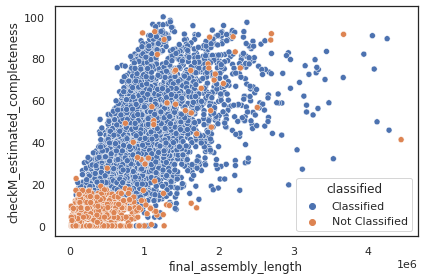

In [8]:
# Merge the general SAG statistics with classification output from the GTDB workflow. 
# Make sure to CHANGE the SAG_file variable
SAG_data=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate.csv')
SAG_data=SAG_data.merge(GTDB_class, how='left', left_on='name', right_on='SAG')
SAG_data[['GTDB_classification', 'GTDBtk_classification']]=SAG_data[['GTDB_classification', 'GTDBtk_classification']].replace(np.nan, 'Unclassified', regex=True)


SAG_data.to_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate_GTDBclass.csv')
SAG_data

# create a graph of genome size vs completeness labeled with wether or not GTDB classified the cell
class_parameters=SAG_data[['name', 'final_assembly_length', 'GTDB_classification', 'checkM_estimated_completeness']]
class_parameters['classified']=np.where(class_parameters['GTDB_classification'] != 'Unclassified', 'Classified', 'Not Classified')
class_parameters['checkM_estimated_completeness']=class_parameters['checkM_estimated_completeness'].fillna(0)
class_parameters=class_parameters.sort_values(by='classified')
class_parameters
sns.scatterplot(data=class_parameters, x='final_assembly_length', y='checkM_estimated_completeness', hue='classified')
plt.tight_layout()
plt.savefig(images+"GTDB_classification_size_vs_completeness.pdf")


In [9]:
unique_class=SAG_data.GTDB_classification.unique()
unique_class

File=open('unique_GTDSB_classifications.txt','w')

for element in unique_class:
    File.write(element)
    File.write('\n')  
File.close()
unique_class

array(['Pelagibacter', 'Hel1-33-131', 'IMCC9063', 'Thioglobus',
       'SCGC-AAA076-P13', 'Unclassified', 'UBA10364', 'SGZJ01',
       'Polaribacter', 'Planktomarina', 'MS024-2A', 'Amylibacter',
       'D2472', 'UBA7428', 'Pseudohongiellaceae', 'UBA4465', 'ASP10-02a',
       'OM182', 'Octadecabacter', 'UBA1994', 'HTCC2207', 'UBA4592',
       'Winogradskyella', 'MAG-120531', 'Litoricola', 'MAG-121220-bin8',
       'RS62', 'UBA1494_A', 'MGIIb-O3', 'UBA2040', 'UBA985', 'HC6-5',
       'Puniceispirillum', 'Akkermansiaceae', 'Yoonia', 'UBA10347',
       'UBA9320', 'UBA4466', 'Algibacter_B', 'UBA10066', 'UBA4582',
       'UBA9926', 'AG-422-B15', 'Ulvibacter', 'UBA4421', 'HIMB59', 'UA16',
       'UBA952', 'AAA536-G10', 'Flavobacteriales', 'Glaciecola',
       'SCGC-AAA160-P02', 'UBA7326', 'UBA3031', 'UBA5109', 'UBA4441',
       'MED-G78', 'Ascidiaceihabitans', 'AG-414-E02', 'GCA-002722245',
       'GCA-002712045', 'Pelagibacter_A', 'UBA6770', 'SHAN690', 'OLB19',
       'AG-337-I02', 'Porticoc

In [10]:
outdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/'

In [11]:
from collections import Counter
Counter(SAG_data['GTDB_classification']).most_common()[:10]

[('Unclassified', 1790),
 ('Pelagibacter', 628),
 ('SW10', 326),
 ('SCGC-AAA076-P13', 178),
 ('D2472', 173),
 ('Amylibacter', 159),
 ('Planktomarina', 156),
 ('Akkermansiaceae', 134),
 ('MAG-121220-bin8', 104),
 ('MS024-2A', 94)]

In [12]:
columns=['name', 'final_assembly_length', 'gc_content', 'estimated_diameter', 'Sample_collection_Date', 'gate',
         'GTDB_classification', 'checkM_estimated_completeness', 'total_CDS_count', 'hypothetical_cds_fraction', 'FACS_date']
SAG_data=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate_GTDBclass.csv', 
                     usecols=columns)

SAG_data

,name,final_assembly_length,gc_content,checkM_estimated_completeness,total_CDS_count,hypothetical_cds_fraction,estimated_diameter,Sample_collection_Date,FACS_date,gate,GTDB_classification
0,AH-135-A01,378833,29.810761,22.64,390.0,0.241026,0.31,170412,170412,Respiring cells (RSG-positive),Pelagibacter
1,AH-135-A02,1800737,36.025194,86.23,1622.0,0.332306,0.32,170412,170412,Respiring cells (RSG-positive),Hel1-33-131
2,AH-135-A03,856845,32.011857,74.13,919.0,0.228509,0.31,170412,170412,Respiring cells (RSG-positive),IMCC9063
3,AH-135-A04,1481697,36.515900,83.69,1467.0,0.194274,0.34,170412,170412,Respiring cells (RSG-positive),Thioglobus
4,AH-135-A05,382026,34.990812,19.18,400.0,0.275000,0.31,170412,170412,Respiring cells (RSG-positive),SCGC-AAA076-P13
...,...,...,...,...,...,...,...,...,...,...,...
5845,AH-273-P18,1350893,29.358432,67.28,1262.0,0.353407,0.41,171102,171102,All prokaryotes (SYTO-9-positive),MAG-121220-bin8
5846,AH-273-P19,1073725,34.482293,55.29,1015.0,0.353695,0.34,171102,171102,All prokaryotes (SYTO-9-positive),UBA3537
5847,AH-273-P20,1000803,29.565959,80.98,1045.0,0.222967,0.23,171102,171102,All prokaryotes (SYTO-9-positive),Pelagibacter_A
5848,AH-273-P22,316565,29.359215,20.13,348.0,0.247126,0.25,171102,171102,All prokaryotes (SYTO-9-positive),Pelagibacter


In [13]:
Syto9_SAGs=SAG_data[SAG_data.gate=='All prokaryotes (SYTO-9-positive)']


#Syto9_SAGs['Sample_collection_Date']=Syto9_SAGs['Sample_collection_Date'].astype(str)
Syto9_SAGs['count']=1

Syto9_genus_counts=pd.pivot_table(Syto9_SAGs, index='GTDB_classification', values='count', aggfunc=np.sum)
Syto9_tencell_genera=Syto9_genus_counts[Syto9_genus_counts['count'] >=10].copy()
Syto9_tencell_genera=Syto9_tencell_genera.reset_index()
Syto9_tencell_list=Syto9_tencell_genera['GTDB_classification'].values.tolist()
Syto9_tencell_list

MyFile=open(outdir+ 'Genera_with_10+_Syto9_SAGs.txt','w')

for element in Syto9_tencell_list:
     MyFile.write(element)
     MyFile.write('\n')
MyFile.close()


Syto9_SAGs=Syto9_SAGs[Syto9_SAGs.Sample_collection_Date==Syto9_SAGs.FACS_date]

Syto_pivot=pd.pivot_table(Syto9_SAGs, index='GTDB_classification', values='count', columns='Sample_collection_Date', aggfunc=np.sum)

Syto_pivot['170412_SAG_abundnance']=Syto_pivot[170412]/Syto_pivot[170412].sum()
Syto_pivot['170818_SAG_abundnance']=Syto_pivot[170818]/Syto_pivot[170818].sum()
Syto_pivot['171102_SAG_abundnance']=Syto_pivot[171102]/Syto_pivot[171102].sum()
Syto_pivot['181030_SAG_abundnance']=Syto_pivot[181030]/Syto_pivot[181030].sum()
Syto_pivot['190402_SAG_abundnance']=Syto_pivot[190402]/Syto_pivot[190402].sum()
Syto_pivot['190709_SAG_abundnance']=Syto_pivot[190709]/Syto_pivot[190709].sum()

Syto_pivot

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Sample_collection_Date,170412,170818,171102,181030,190402,190709,170412_SAG_abundnance,170818_SAG_abundnance,171102_SAG_abundnance,181030_SAG_abundnance,190402_SAG_abundnance,190709_SAG_abundnance
GTDB_classification,,,,,,,,,,,,
2-01-FULL-41-14,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.003650,NaN,NaN,NaN
AAA536-G10,7.0,5.0,3.0,6.0,2.0,1.0,0.028689,0.018657,0.010949,0.021127,0.007353,0.003448
AG-337-I02,1.0,1.0,3.0,1.0,NaN,NaN,0.004098,0.003731,0.010949,0.003521,NaN,NaN
AG-339-G14,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.003521,NaN,NaN
AG-422-B15,2.0,NaN,1.0,NaN,2.0,1.0,0.008197,NaN,0.003650,NaN,0.007353,0.003448
...,...,...,...,...,...,...,...,...,...,...,...,...
Vibrio,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.003650,NaN,NaN,NaN
Vicingaceae,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.003676,NaN
Winogradskyella,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.011029,NaN


In [14]:
RSG_SAGs=SAG_data[SAG_data.gate == 'Respiring cells (RSG-positive)']

RSG_SAGs['count']=1


RSG_genus_counts=pd.pivot_table(RSG_SAGs, index='GTDB_classification', values='count', aggfunc=np.sum)
RSG_tencell_genera=RSG_genus_counts[RSG_genus_counts['count'] >=10].copy()
RSG_tencell_genera=RSG_tencell_genera.reset_index()
RSG_tencell_list=RSG_tencell_genera['GTDB_classification'].values.tolist()
RSG_tencell_list

MyFile=open(outdir+ 'Genera_with_10+_RSG_SAGs.txt','w')

for element in RSG_tencell_list:
     MyFile.write(element)
     MyFile.write('\n')
MyFile.close()


RSG_SAGs=RSG_SAGs[RSG_SAGs.Sample_collection_Date==RSG_SAGs.FACS_date]

RSG_pivot=pd.pivot_table(RSG_SAGs, index='GTDB_classification', values='count', columns='Sample_collection_Date', aggfunc=np.sum)

RSG_pivot['170412_SAG_abundnance']=RSG_pivot[170412]/RSG_pivot[170412].sum()
RSG_pivot['170818_SAG_abundnance']=RSG_pivot[170818]/RSG_pivot[170818].sum()
RSG_pivot['171102_SAG_abundnance']=RSG_pivot[171102]/RSG_pivot[171102].sum()
RSG_pivot['181030_SAG_abundnance']=RSG_pivot[181030]/RSG_pivot[181030].sum()
RSG_pivot['190402_SAG_abundnance']=RSG_pivot[190402]/RSG_pivot[190402].sum()
RSG_pivot['190709_SAG_abundnance']=RSG_pivot[190709]/RSG_pivot[190709].sum()

RSG_pivot

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Sample_collection_Date,170412,170818,171102,181030,190402,190709,170412_SAG_abundnance,170818_SAG_abundnance,171102_SAG_abundnance,181030_SAG_abundnance,190402_SAG_abundnance,190709_SAG_abundnance
GTDB_classification,,,,,,,,,,,,
AAA536-G10,1.0,4.0,2.0,3.0,5.0,1.0,0.003534,0.013468,0.006734,0.010638,0.018248,0.003610
AG-337-I02,NaN,1.0,1.0,4.0,NaN,NaN,NaN,0.003367,0.003367,0.014184,NaN,NaN
AG-414-E02,1.0,NaN,NaN,NaN,NaN,NaN,0.003534,NaN,NaN,NaN,NaN,NaN
AG-422-B15,1.0,2.0,1.0,NaN,3.0,NaN,0.003534,0.006734,0.003367,NaN,0.010949,NaN
ASP10-02a,5.0,NaN,NaN,NaN,4.0,NaN,0.017668,NaN,NaN,NaN,0.014599,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
UBA9926,3.0,NaN,4.0,NaN,2.0,4.0,0.010601,NaN,0.013468,NaN,0.007299,0.014440
Ulvibacter,2.0,NaN,NaN,NaN,1.0,NaN,0.007067,NaN,NaN,NaN,0.003650,NaN
Unclassified,76.0,77.0,97.0,44.0,55.0,60.0,0.268551,0.259259,0.326599,0.156028,0.200730,0.216606


In [15]:
Lam_SAGs=SAG_data[SAG_data.gate=='Laminarin-positives']

Lam_SAGs['count']=1

Lam_genus_counts=pd.pivot_table(Lam_SAGs, index='GTDB_classification', values='count', aggfunc=np.sum)
Lam_tencell_genera=Lam_genus_counts[Lam_genus_counts['count'] >=10].copy()
Lam_tencell_genera=Lam_tencell_genera.reset_index()
Lam_tencell_list=Lam_tencell_genera['GTDB_classification'].values.tolist()
Lam_tencell_list

MyFile=open(outdir+ 'Genera_with_10+_Lam_SAGs.txt','w')

for element in Lam_tencell_list:
     MyFile.write(element)
     MyFile.write('\n')
MyFile.close()



Lam_SAGs=Lam_SAGs[Lam_SAGs.Sample_collection_Date==Lam_SAGs.FACS_date]

Lam_pivot=pd.pivot_table(Lam_SAGs, index='GTDB_classification', values='count', columns='Sample_collection_Date', aggfunc=np.sum)

Lam_pivot['181030_SAG_abundnance']=Lam_pivot[181030]/Lam_pivot[181030].sum()
Lam_pivot['190402_SAG_abundnance']=Lam_pivot[190402]/Lam_pivot[190402].sum()
Lam_pivot['190709_SAG_abundnance']=Lam_pivot[190709]/Lam_pivot[190709].sum()

Lam_pivot

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Sample_collection_Date,181030,190402,190709,181030_SAG_abundnance,190402_SAG_abundnance,190709_SAG_abundnance
GTDB_classification,,,,,,
AAA164-E04,11.0,NaN,NaN,0.044355,NaN,NaN
ASP10-02a,NaN,NaN,1.0,NaN,NaN,0.003497
Akkermansiaceae,22.0,35.0,28.0,0.088710,0.183246,0.097902
Algibacter_B,NaN,1.0,1.0,NaN,0.005236,0.003497
Arenicella,NaN,NaN,1.0,NaN,NaN,0.003497
BMS3Bbin11,NaN,NaN,1.0,NaN,NaN,0.003497
D2472,NaN,1.0,NaN,NaN,0.005236,NaN
DEV007,3.0,NaN,NaN,0.012097,NaN,NaN
Desulfosarcina,NaN,1.0,NaN,NaN,0.005236,NaN


In [16]:
Xylan_SAGs=SAG_data[SAG_data.gate=='Xylan-positives']

Xylan_SAGs['count']=1

Xylan_genus_counts=pd.pivot_table(Xylan_SAGs, index='GTDB_classification', values='count', aggfunc=np.sum)
Xylan_tencell_genera=Xylan_genus_counts[Xylan_genus_counts['count'] >=10].copy()
Xylan_tencell_genera=Xylan_tencell_genera.reset_index()
Xylan_tencell_list=Xylan_tencell_genera['GTDB_classification'].values.tolist()
Xylan_tencell_list

MyFile=open(outdir+ 'Genera_with_10+_Xylan_SAGs.txt','w')

for element in Xylan_tencell_list:
     MyFile.write(element)
     MyFile.write('\n')
MyFile.close()



Xylan_SAGs=Xylan_SAGs[Xylan_SAGs.Sample_collection_Date==Xylan_SAGs.FACS_date]

Xylan_pivot=pd.pivot_table(Xylan_SAGs, index='GTDB_classification', values='count', columns='Sample_collection_Date', aggfunc=np.sum)


Xylan_pivot['181030_SAG_abundnance']=Xylan_pivot[181030]/Xylan_pivot[181030].sum()
Xylan_pivot['190709_SAG_abundnance']=Xylan_pivot[190709]/Xylan_pivot[190709].sum()

Xylan_pivot

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Sample_collection_Date,181030,190709,181030_SAG_abundnance,190709_SAG_abundnance
GTDB_classification,,,,
AAA164-E04,6.0,NaN,0.027907,NaN
Akkermansiaceae,6.0,23.0,0.027907,0.086142
Amylibacter,NaN,1.0,NaN,0.003745
Arctic95D-9,1.0,3.0,0.004651,0.011236
Congregibacter,NaN,1.0,NaN,0.003745
DEV007,8.0,1.0,0.037209,0.003745
GCA-2715965,NaN,1.0,NaN,0.003745
MGIIa-L1,1.0,NaN,0.004651,NaN
MGIIa-L2,1.0,NaN,0.004651,NaN


In [17]:

Syto_pivot.to_csv(outdir+ 'Syto9_SAG_abundances.csv')
RSG_pivot.to_csv(outdir+ 'RSG_SAG_abundances.csv')
Lam_pivot.to_csv(outdir+ 'Laminarin_SAG_abundances.csv')
Xylan_pivot.to_csv(outdir+ 'Xylan_SAG_abundances.csv')


In [18]:
# create a list of genera with 10+ SAGs
SAG_data['count']=1
genus_counts=pd.pivot_table(SAG_data, index='GTDB_classification', values='count', aggfunc=np.sum)
genus_counts

tencell_genera=genus_counts[genus_counts['count'] >=10].copy()
tencell_genera=tencell_genera.reset_index()
tencell_list=tencell_genera['GTDB_classification'].values.tolist()
tencell_list

MyFile=open(outdir+ 'Genera_with_10+_SAGs.txt','w')

for element in tencell_list:
     MyFile.write(element)
     MyFile.write('\n')
MyFile.close()
